In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r"C:\Users\abhic\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")

In [3]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [4]:
test_df= pd.read_csv(r"C:\Users\abhic\Downloads\Project-Housing--2---1-\Project-Housing_splitted\test.csv")

In [5]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [6]:
# Let's display all columns with null values in the train dataset and their respective null values count

null_train=pd.DataFrame(train_df[train_df.columns[train_df.isnull().any()]].isnull().sum())
null_train.columns=['null_values']
null_train['% of null values']=null_train['null_values']/11.68
null_train

,null_values,% of null values
LotFrontage,214,18.321918
Alley,1091,93.407534
MasVnrType,7,0.599315
MasVnrArea,7,0.599315
BsmtQual,30,2.568493
BsmtCond,30,2.568493
BsmtExposure,31,2.654110
BsmtFinType1,30,2.568493
BsmtFinType2,31,2.654110
FireplaceQu,551,47.174658


In [7]:
# Let's display all columns with null values in the test data set and their respective null values count

null_test=pd.DataFrame(test_df[test_df.columns[test_df.isnull().any()]].isnull().sum())
null_test.columns=['null_values']
null_test['% of null values']=null_test['null_values']/11.68
null_train

,null_values,% of null values
LotFrontage,214,18.321918
Alley,1091,93.407534
MasVnrType,7,0.599315
MasVnrArea,7,0.599315
BsmtQual,30,2.568493
BsmtCond,30,2.568493
BsmtExposure,31,2.654110
BsmtFinType1,30,2.568493
BsmtFinType2,31,2.654110
FireplaceQu,551,47.174658


In [8]:
# Checking the shape of the dataset
train_df.shape, test_df.shape


((1168, 81), (292, 80))

We have 1168 rows and 81 columns in the train data set and  292 rows and 80 columns in the test data set



In [9]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

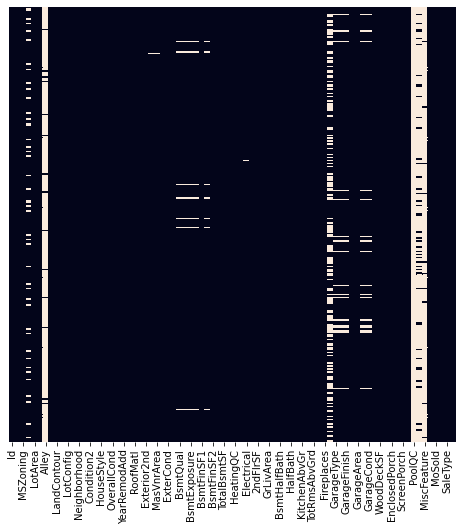

In [11]:
# Let's see the missing values in a plot in train dataset

plt.figure(figsize=(8,8))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

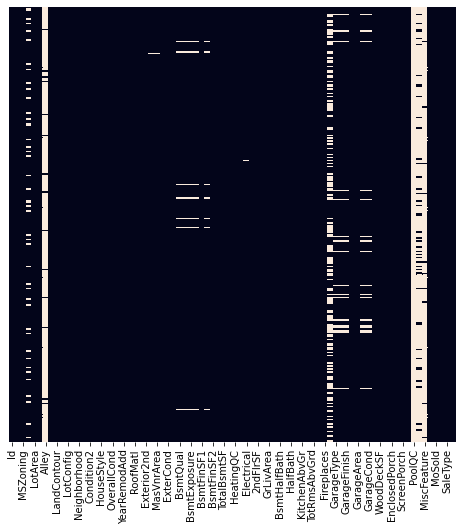

In [12]:
# Let's see the missing values in a plot in test dataset

plt.figure(figsize=(8,8))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [13]:
# Let's check the percentage of missing values of each column for the train dataset

def missing_values_table(train_df):
    mis_val = train_df.isnull().sum()
    mis_val_percent = 100 * train_df.isnull().sum() / len(train_df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(train_df.shape[1]) + " columns.\n"      "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(train_df)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1161,99.4
MiscFeature,1124,96.2
Alley,1091,93.4
Fence,931,79.7
FireplaceQu,551,47.2
LotFrontage,214,18.3
GarageType,64,5.5
GarageYrBlt,64,5.5
GarageFinish,64,5.5
GarageQual,64,5.5


In [14]:
# Let's check the percentage of missing values of each column for the test dataset

def missing_values_table(test_df):
    mis_val = test_df.isnull().sum()
    mis_val_percent = 100 * test_df.isnull().sum() / len(train_df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(train_df.shape[1]) + " columns.\n"      "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(test_df)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,292,25.0
MiscFeature,282,24.1
Alley,278,23.8
Fence,248,21.2
FireplaceQu,139,11.9
LotFrontage,45,3.9
GarageType,17,1.5
GarageYrBlt,17,1.5
GarageFinish,17,1.5
GarageQual,17,1.5


In [15]:
# Let's fill the missing values in categorical columns as NA

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
train_df[columns] = train_df[columns].fillna('NA')

In [16]:
# Let's fill the missing values of MasVnrType with None

train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

In [17]:
# Let's fill the missing values of GarageYrBlt with 0

train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna('0')

In [18]:
# Let's Impute the missing values and replace it with the median

train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(),inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(),inplace=True)

In [19]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
train_df.sum().isnull()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

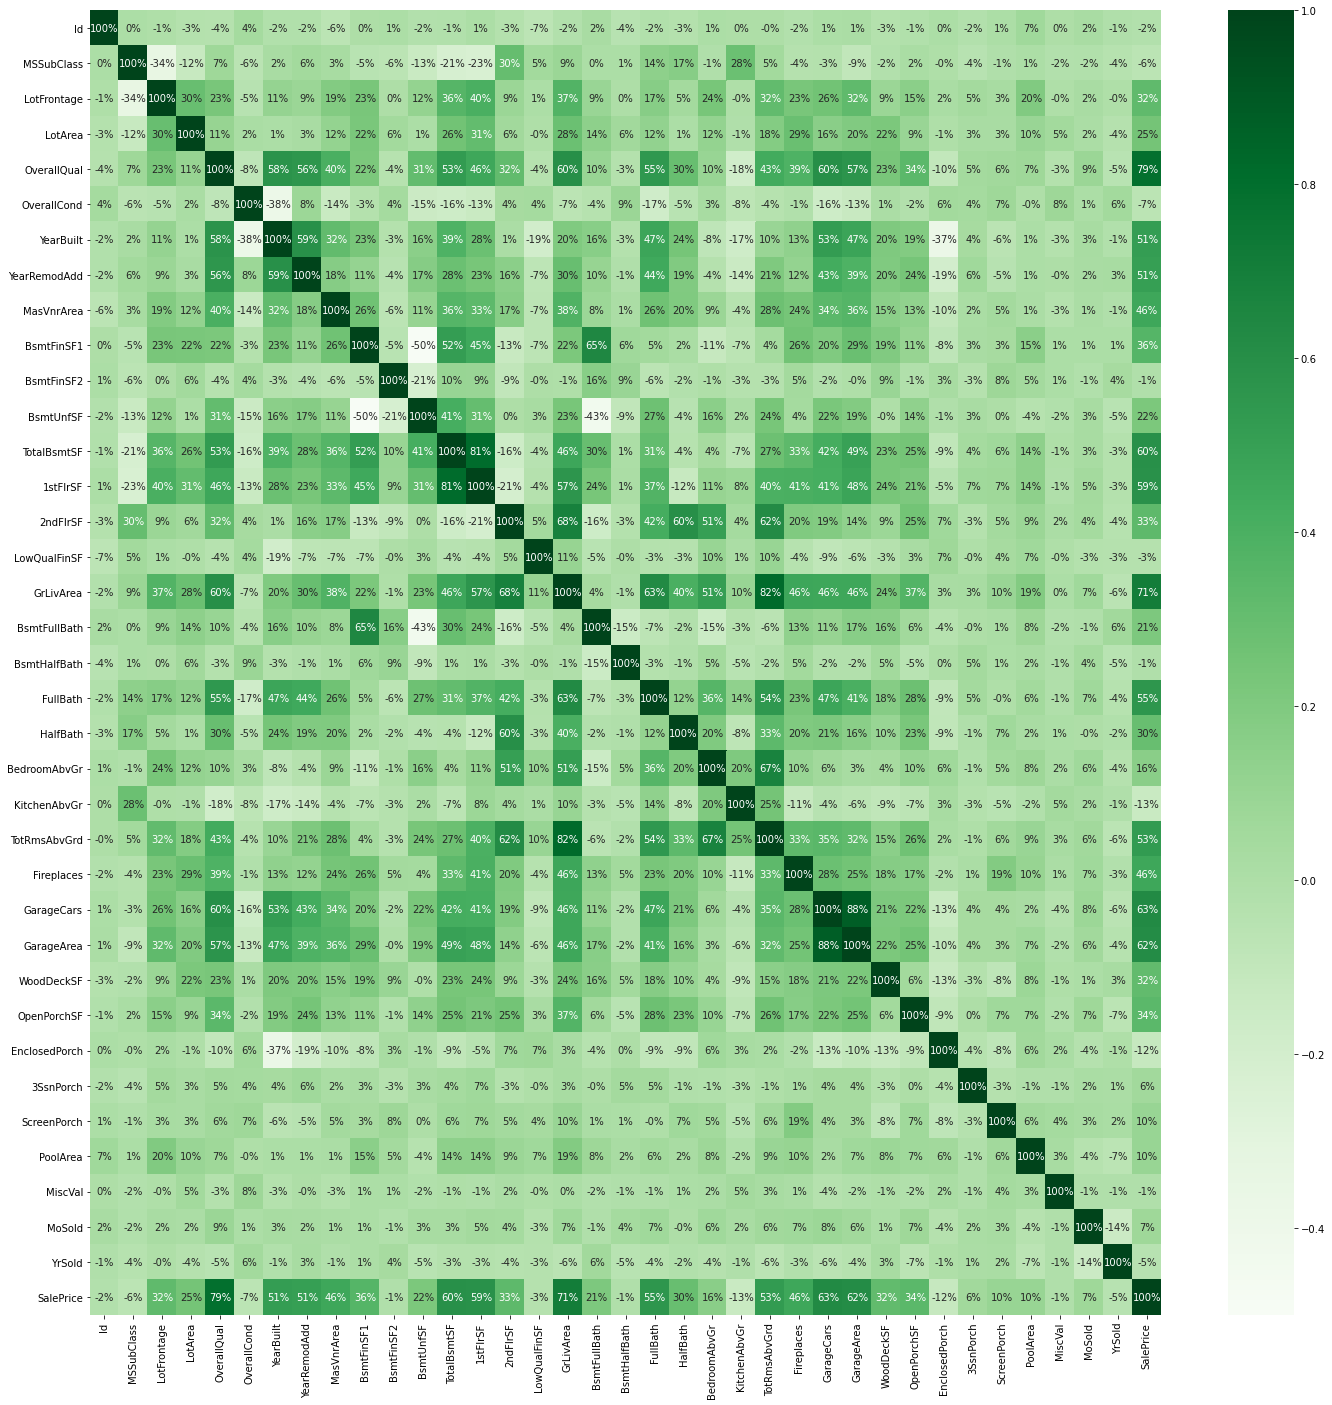

In [21]:
plt.figure(figsize=(24,24))
sns.heatmap(train_df.corr(),annot=True,fmt='.0%',cmap='Greens')
plt.show()

1- from the above plot we can say that SalesPrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

2- from the above plot we can say that SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

3- from the above plot we can observe that multicollinearity in between columns so we will be using Principal Component Analysis(PCA).

4- from the above plot we can say that No correlation has been observed between the column Id and other columns so we will be dropping this column.

Text(0.5, 1.0, 'Correaltion with target variable SalePrice')

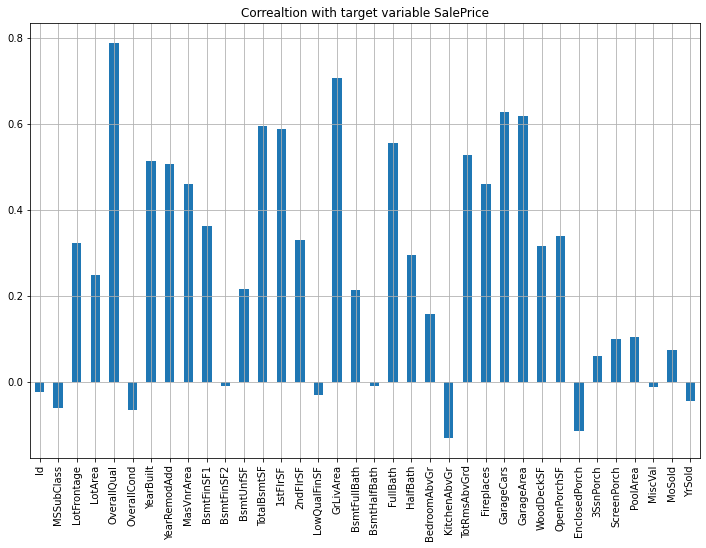

In [22]:
# Let's check the correlation with target variable 'SalePrice'

plt.figure(figsize=(12,8))
train_df.drop('SalePrice', axis=1).corrwith(train_df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correaltion with target variable SalePrice")

from the above plot we can say that the column OverallQual is most positively correlated with SalePrice and the column KitchenAbvGrd is most negatively correlated with SalePrice

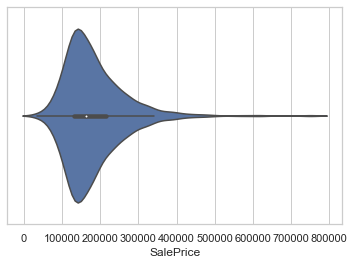

140000    18
135000    16
155000    12
160000    11
139000    11
          ..
103600     1
238000     1
185500     1
132250     1
176485     1
Name: SalePrice, Length: 581, dtype: int64

In [23]:
# Let's Check the target variable

sns.set(style='whitegrid')
sns.violinplot(train_df['SalePrice'])
plt.show()

train_df['SalePrice'].value_counts()

the maximum number of SalePrice lies between 140000 and 230000

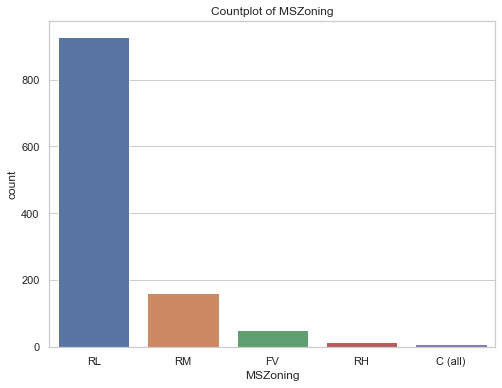

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [24]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=train_df)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

train_df['MSZoning'].value_counts()

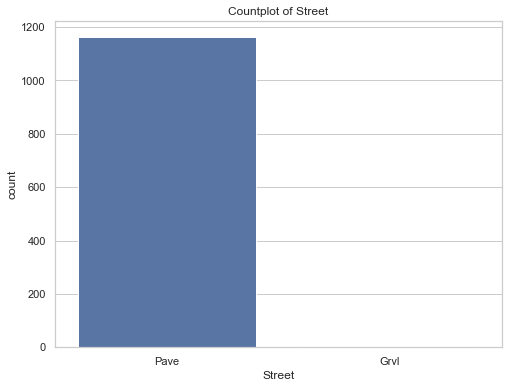

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [25]:
# Let's check the column Street

plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=train_df)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

train_df['Street'].value_counts()

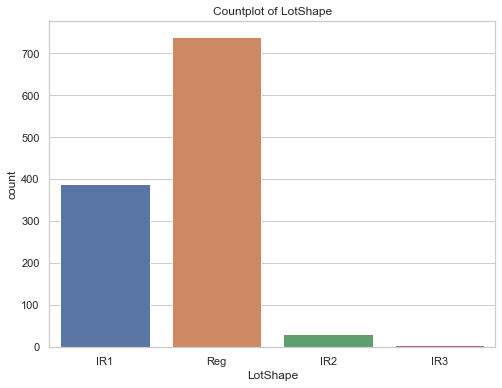

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [26]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=train_df)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

train_df['LotShape'].value_counts()

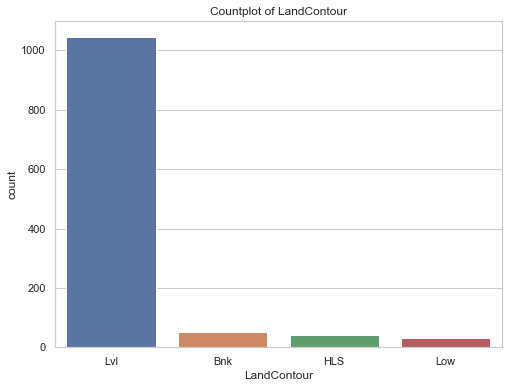

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [27]:
# Let's check the column LandContour

plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=train_df)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

train_df['LandContour'].value_counts()

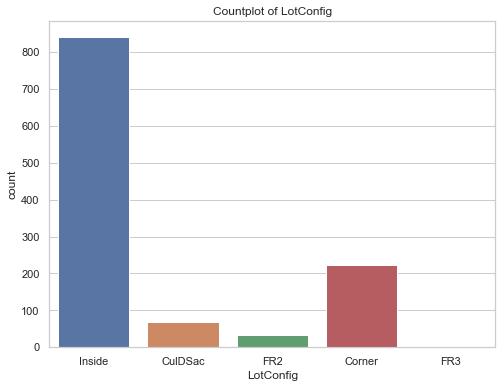

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [28]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=train_df)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

train_df['LotConfig'].value_counts()

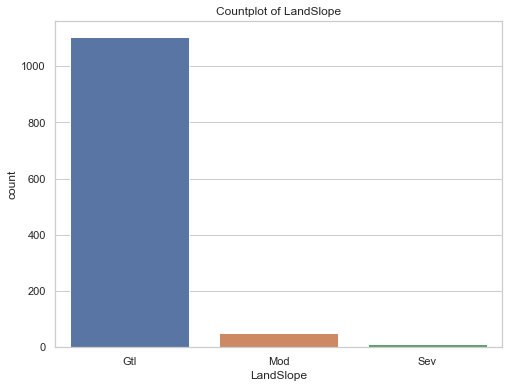

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [29]:
# Let's check the column LandSlope

plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=train_df)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

train_df['LandSlope'].value_counts()

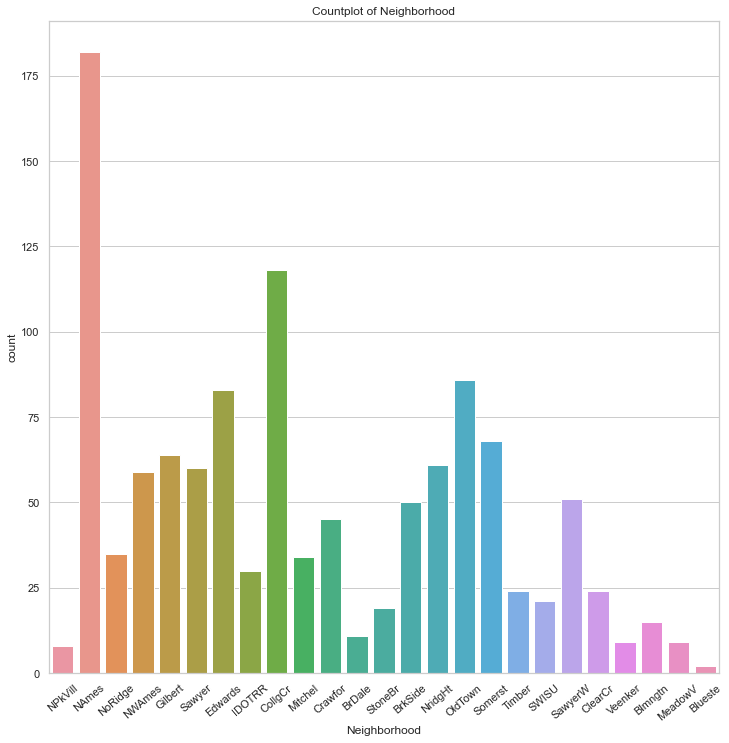

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [30]:
# Let's check the column Neighborhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=train_df)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

train_df['Neighborhood'].value_counts()

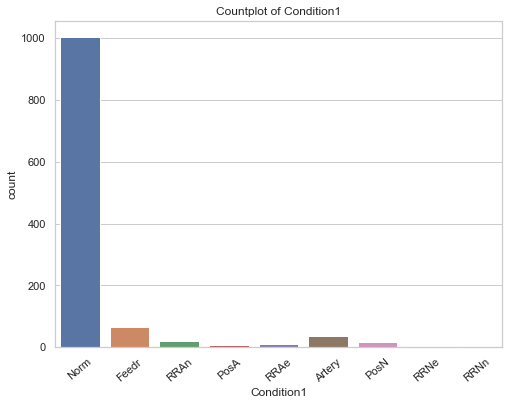

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [31]:
# Let's check the column Condition1

plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=train_df)
plt.title("Countplot of Condition1")
plt.xticks(rotation=40)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

train_df['Condition1'].value_counts()

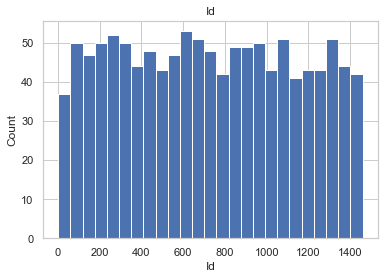

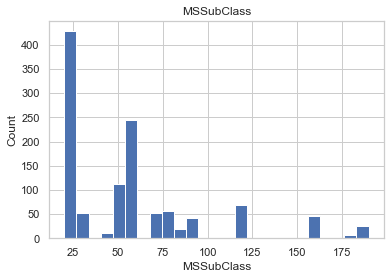

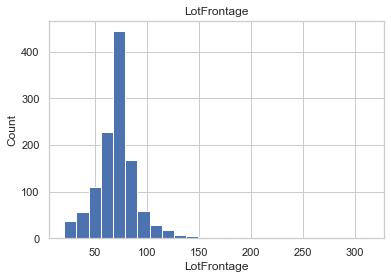

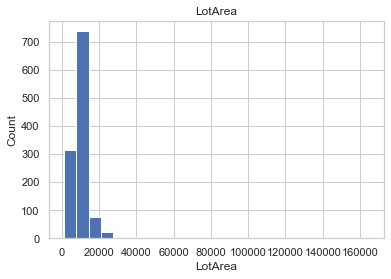

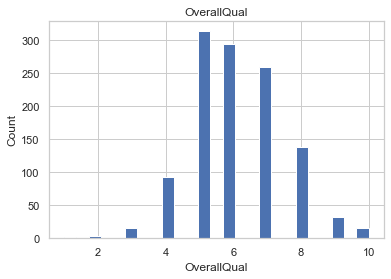

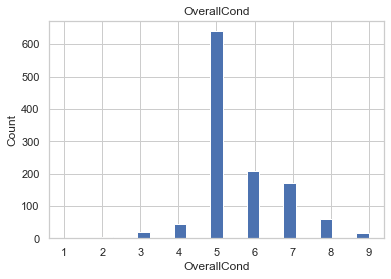

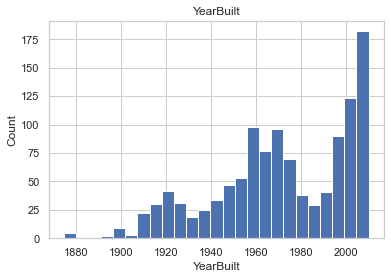

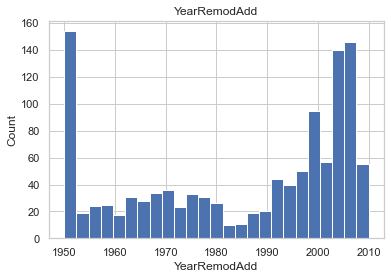

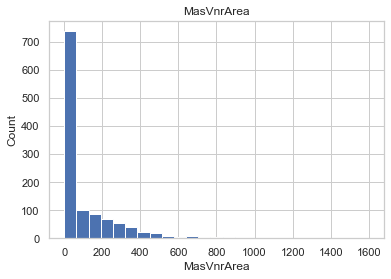

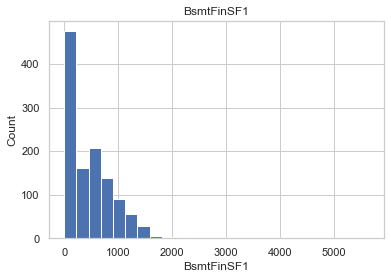

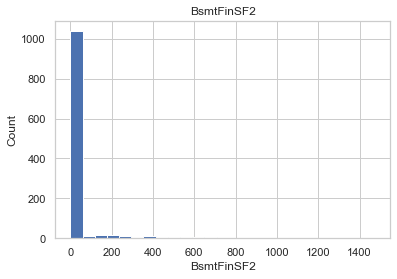

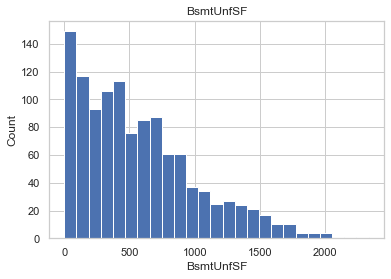

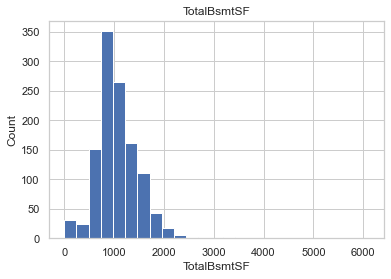

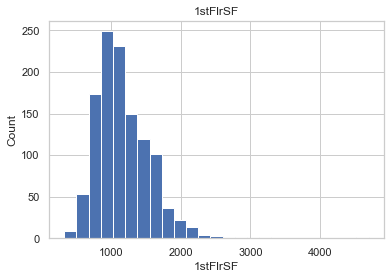

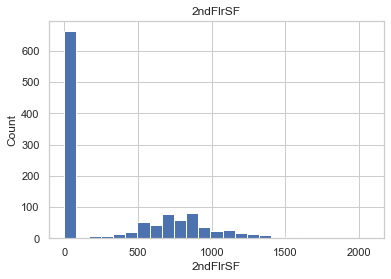

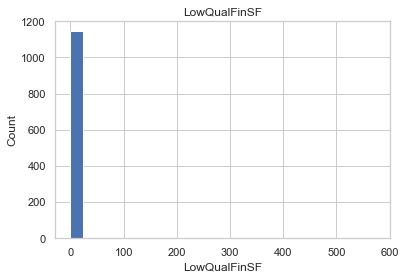

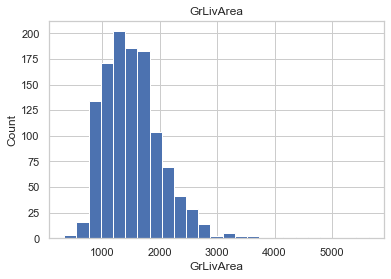

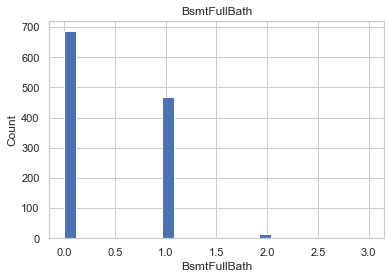

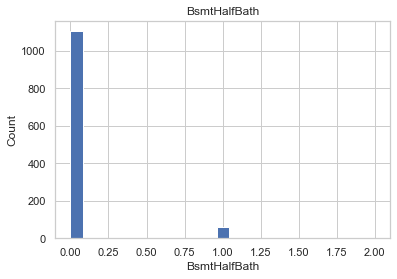

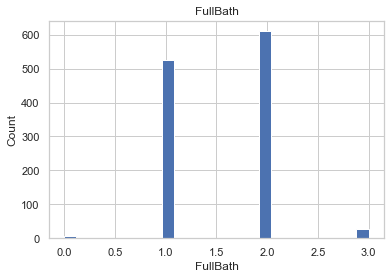

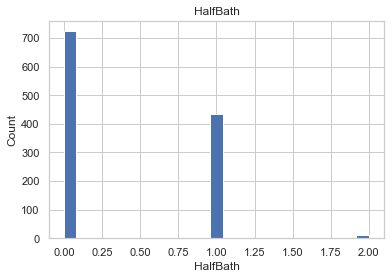

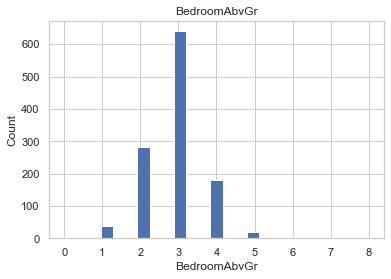

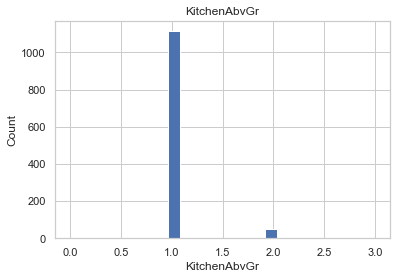

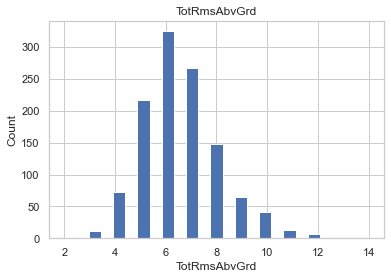

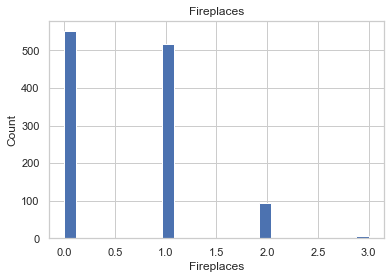

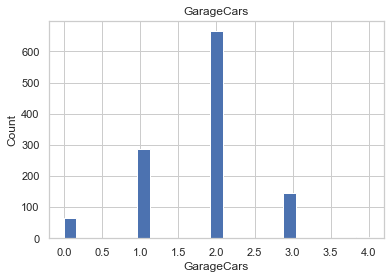

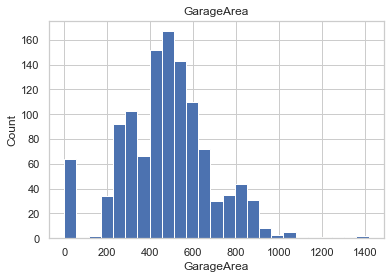

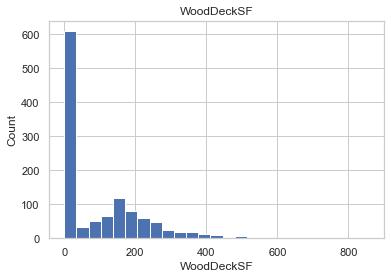

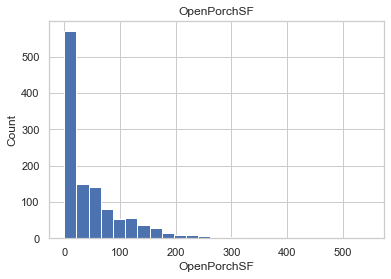

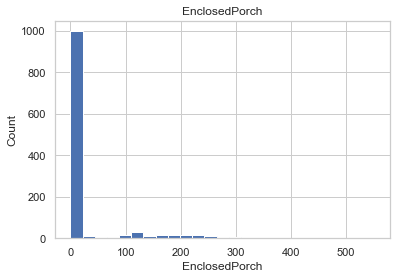

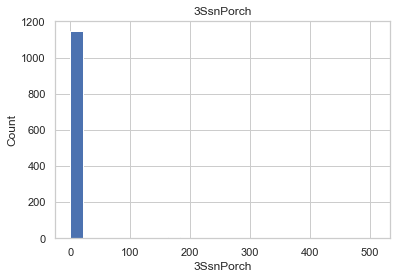

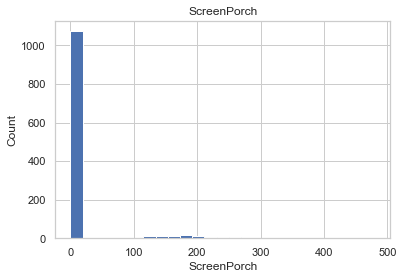

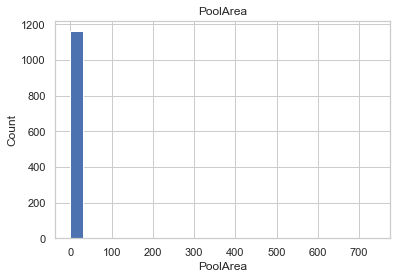

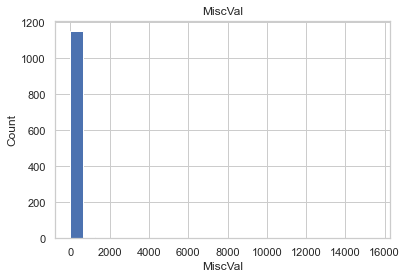

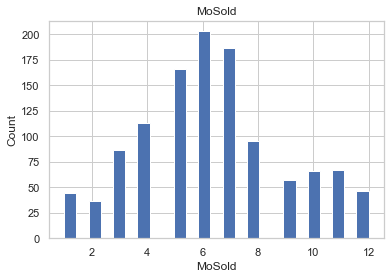

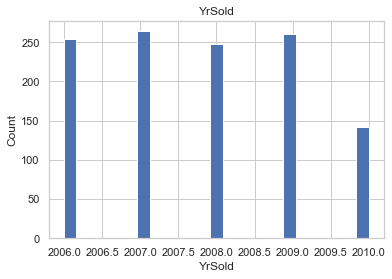

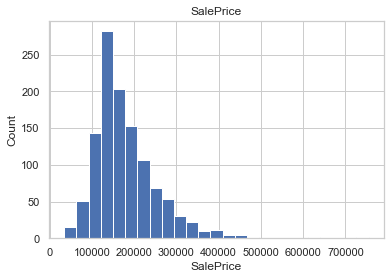

In [32]:
# Let's plot the histogram of every numerical column

for col in train_df.describe().columns:
    data=train_df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

<Figure size 576x432 with 0 Axes>

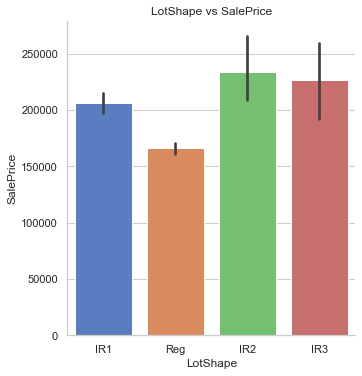

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [33]:
# Let's plot the Factor plot of LotShape vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show();
print(train_df.groupby('SalePrice')['LotShape'].value_counts())

<Figure size 576x432 with 0 Axes>

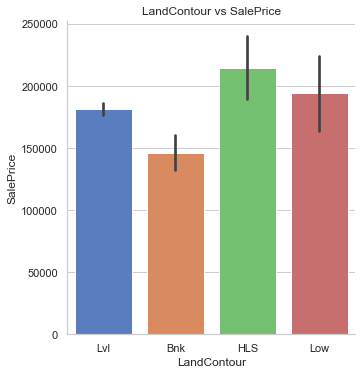

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [34]:
# Let's plot the Factor plot of LandContour vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(train_df.groupby('SalePrice')['LandContour'].value_counts())

<Figure size 576x432 with 0 Axes>

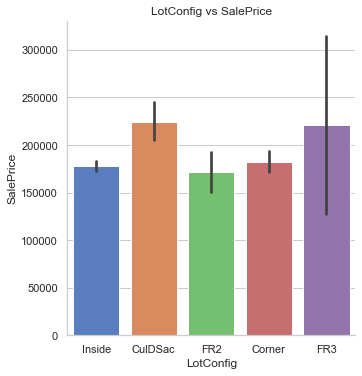

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [35]:
# Let's plot the Factor plot of LotConfig vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(train_df.groupby('SalePrice')['LotConfig'].value_counts())

<Figure size 1152x1152 with 0 Axes>

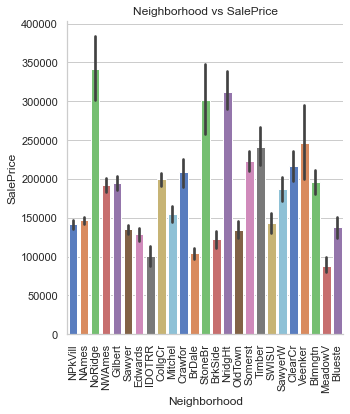

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [36]:
# Let's plot the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(train_df.groupby('SalePrice')['Neighborhood'].value_counts())

<Figure size 576x432 with 0 Axes>

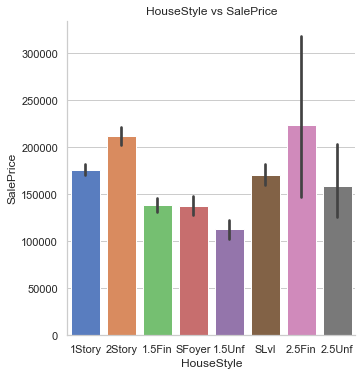

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [37]:
# Let's plot the Factor plot of HouseStyle vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(train_df.groupby('SalePrice')['HouseStyle'].value_counts())

<Figure size 576x432 with 0 Axes>

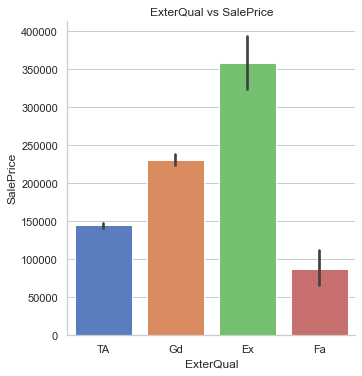

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [38]:
# Let's plot the Factor plot of ExterQual vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(train_df.groupby('SalePrice')['ExterQual'].value_counts())

<Figure size 576x432 with 0 Axes>

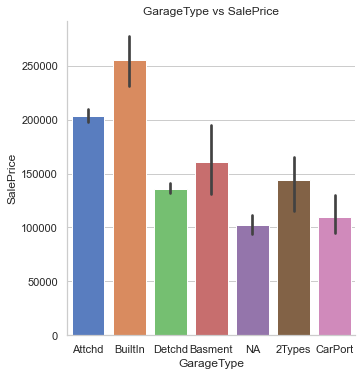

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [39]:
# let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(train_df.groupby('SalePrice')['GarageType'].value_counts())

<Figure size 576x432 with 0 Axes>

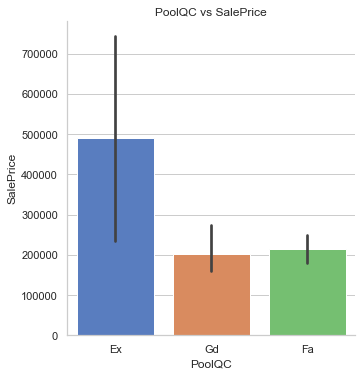

SalePrice  PoolQC
160000     Gd        1
171000     Gd        1
181000     Fa        1
235000     Ex        1
250000     Fa        1
274970     Gd        1
745000     Ex        1
Name: PoolQC, dtype: int64


In [40]:
# Let's plot the Factor plot of PoolQC vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=train_df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('PoolQC vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(train_df.groupby('SalePrice')['PoolQC'].value_counts())

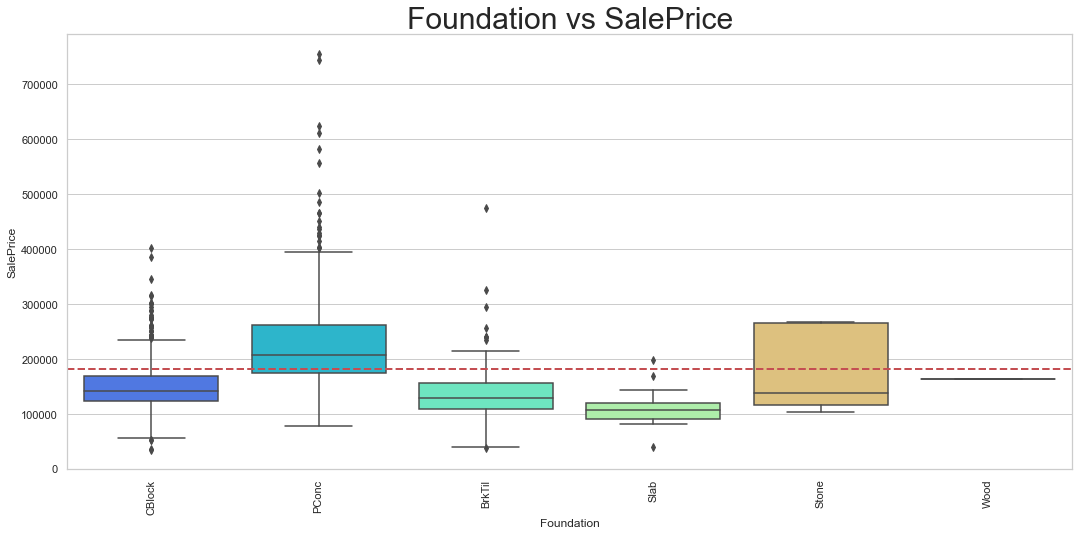

In [41]:
# Let's plot the Foundation vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(train_df['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=train_df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

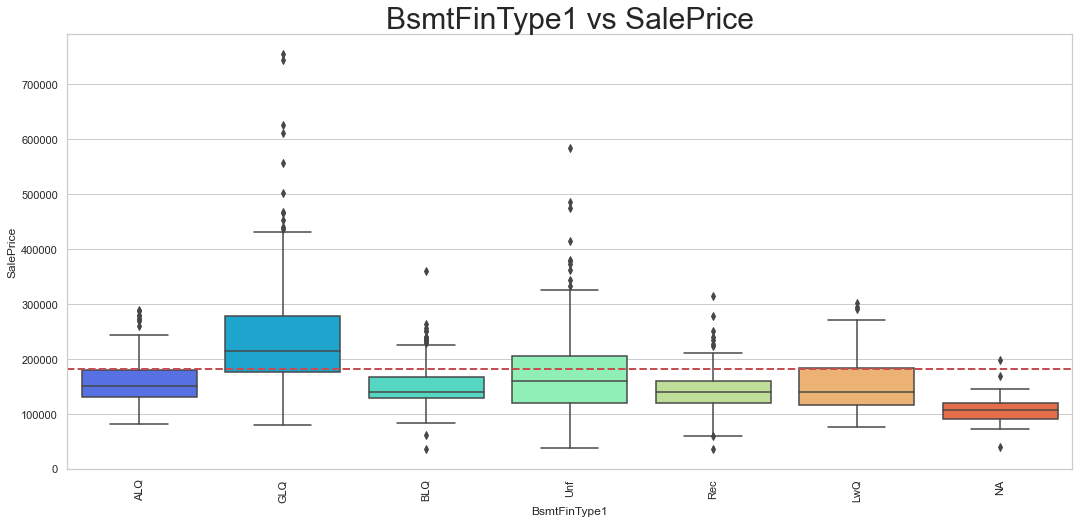

In [42]:
# Let's plot the BsmtFinType1 vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(train_df['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=train_df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("BsmtFinType1 vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()


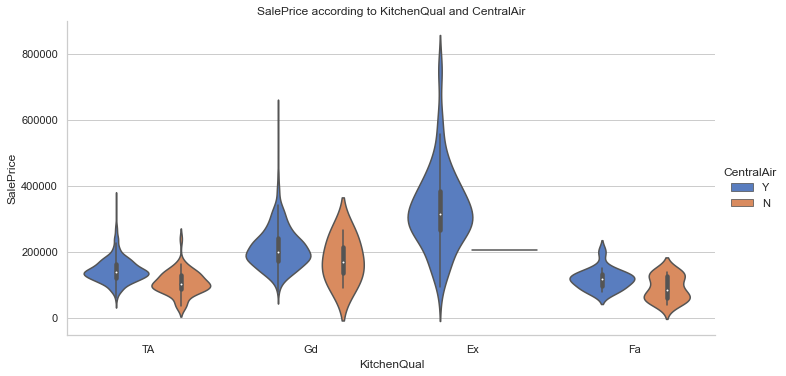

In [43]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=train_df,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

<Figure size 1008x1008 with 0 Axes>

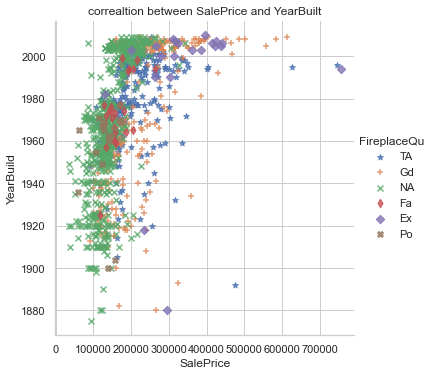

In [44]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning

plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='YearBuilt',fit_reg=False,data=train_df,hue='FireplaceQu',markers=['*','+','x','d','D','X'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and YearBuilt')
plt.ylabel('YearBuild')
plt.show()

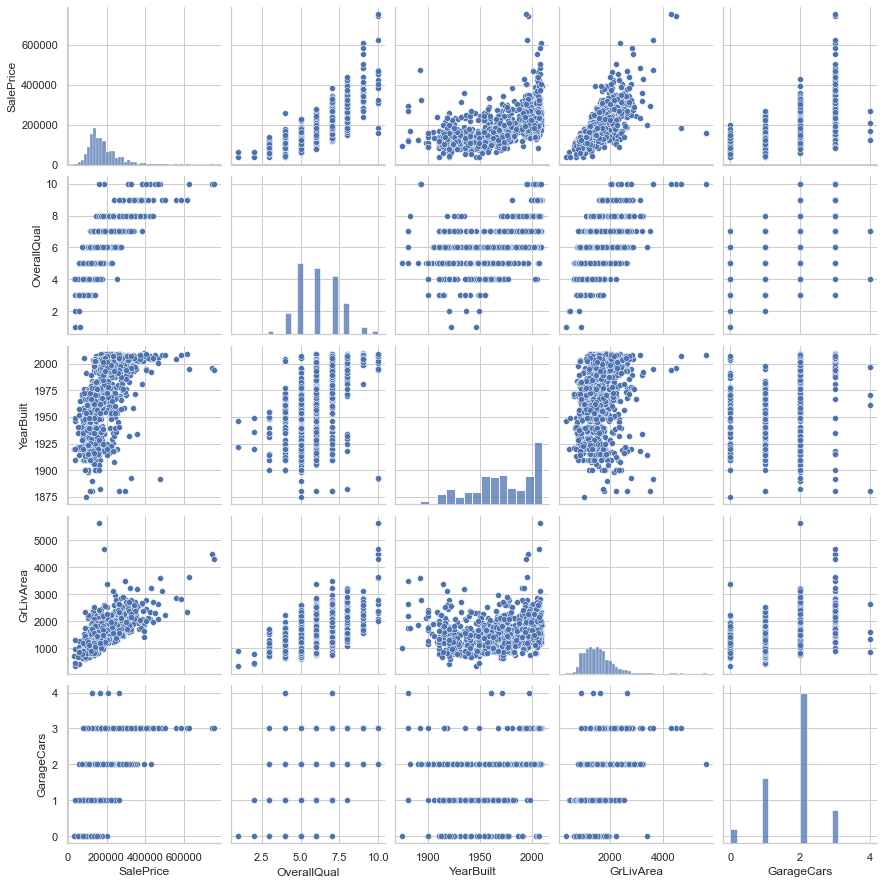

In [45]:
# Let's plot the pairplot

sns.pairplot(train_df, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars'])

In [46]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

train_df = pd.get_dummies(train_df, columns = categorical_cols, drop_first=True)
train_df

,Id,MSSubClass,LotFrontage,LotArea,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,70.0,4928,NaN,AllPub,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,NaN,NaN,

In [47]:
# Let's drop unnecessary columns and the columns which more null values

train_df.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,70.0,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [48]:
# Let's make a copy of our dataset

train_df_copy = train_df.copy()

In [49]:
def percentile_capping(train_df, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=train_df[col], limits=(from_low_end, from_high_end), inplace=True)

In [50]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

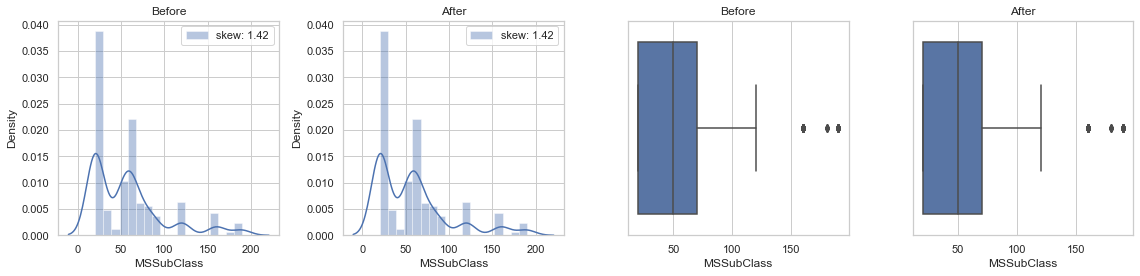

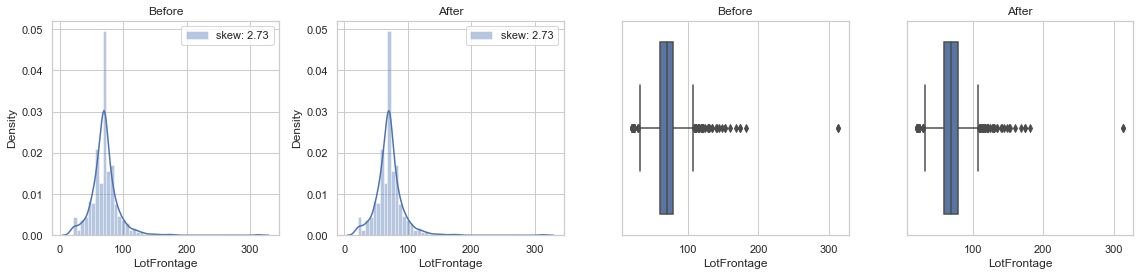

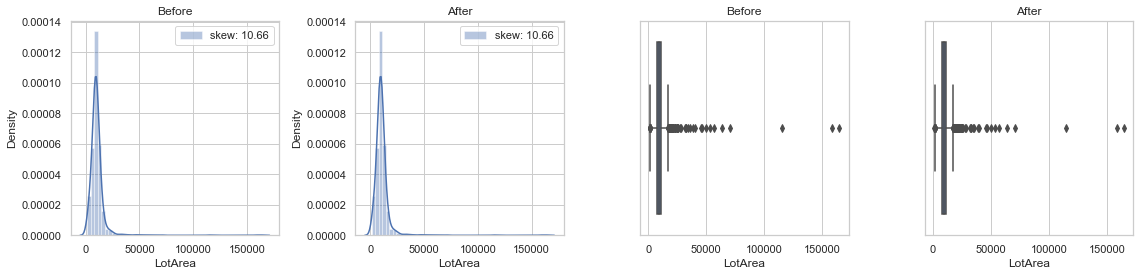

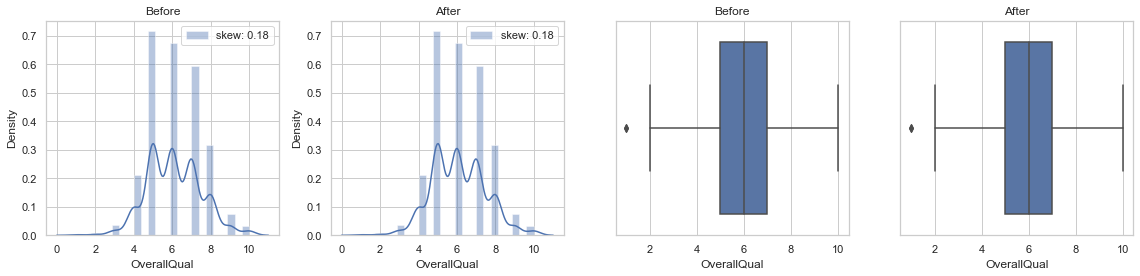

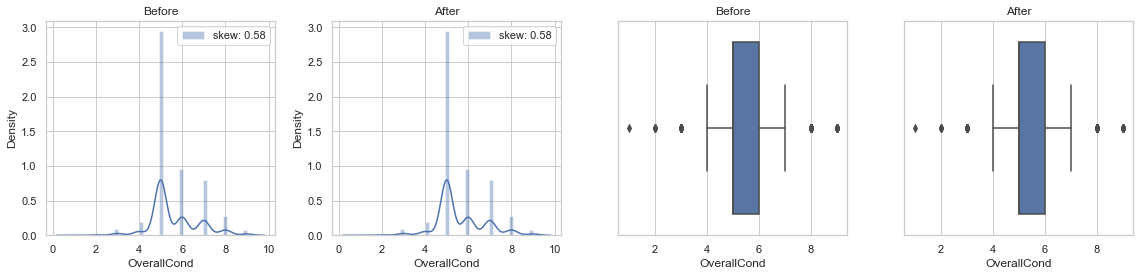

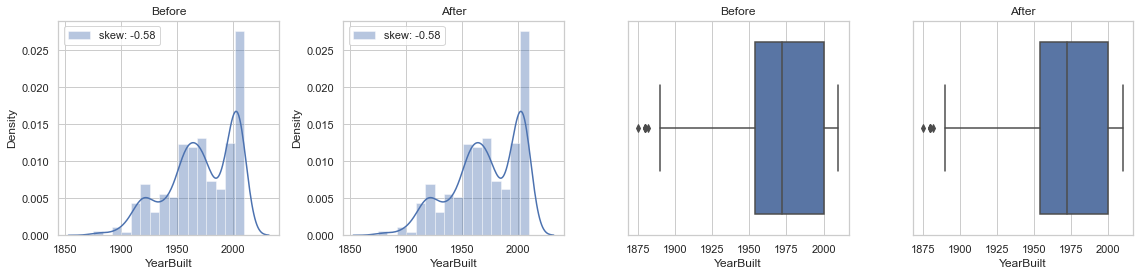

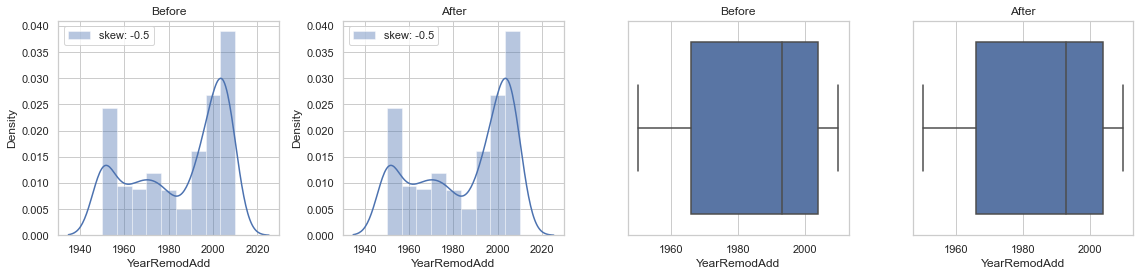

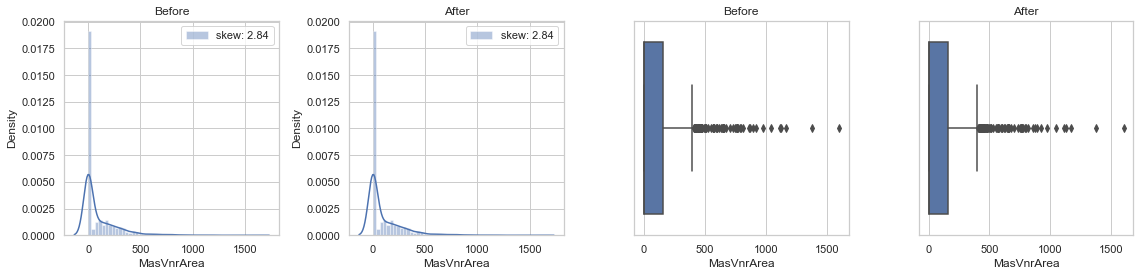

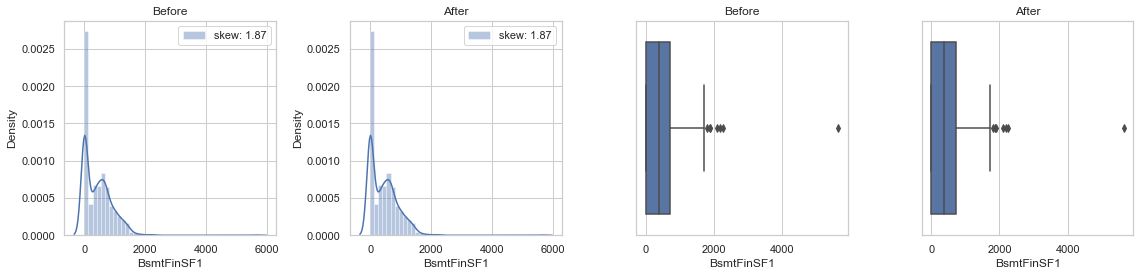

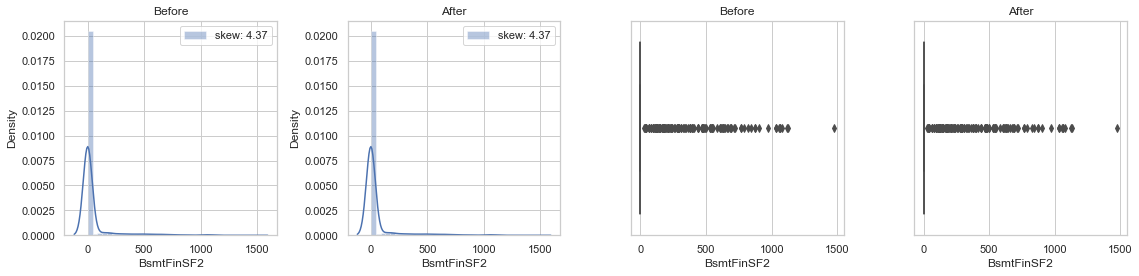

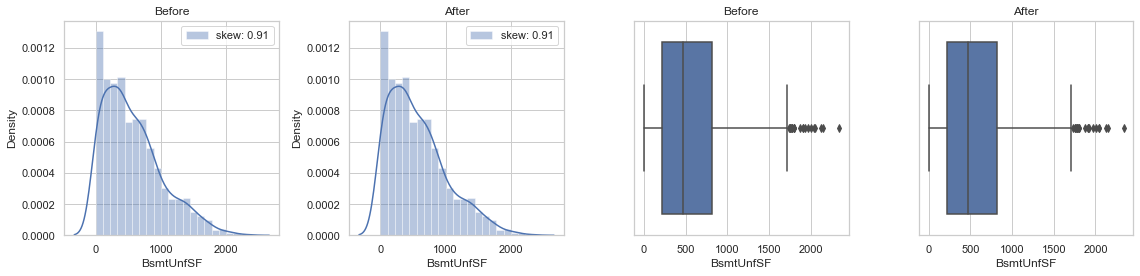

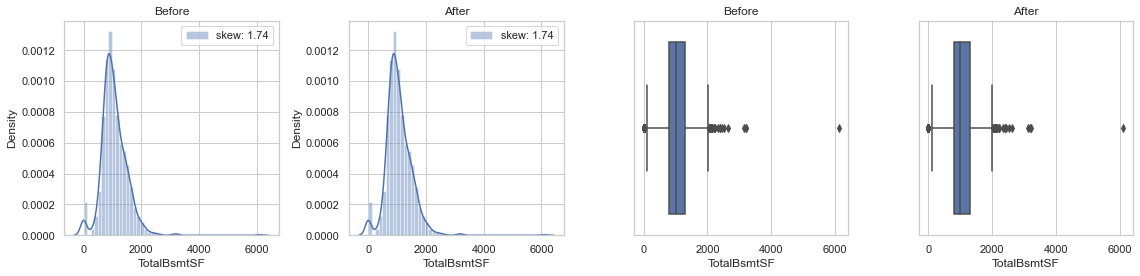

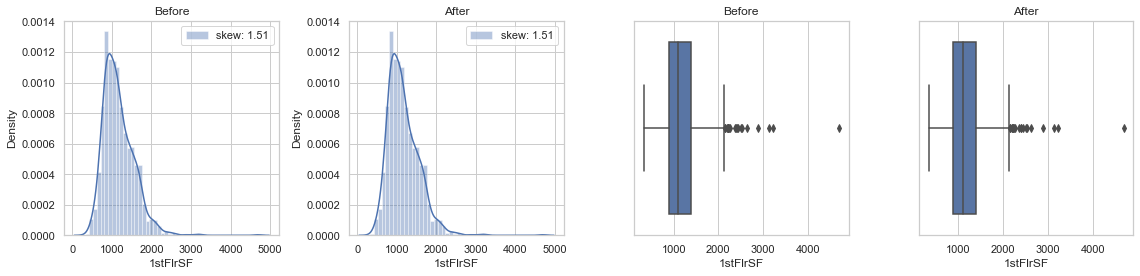

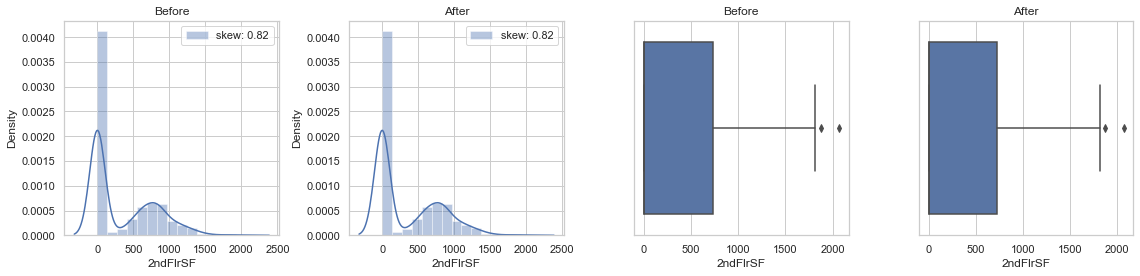

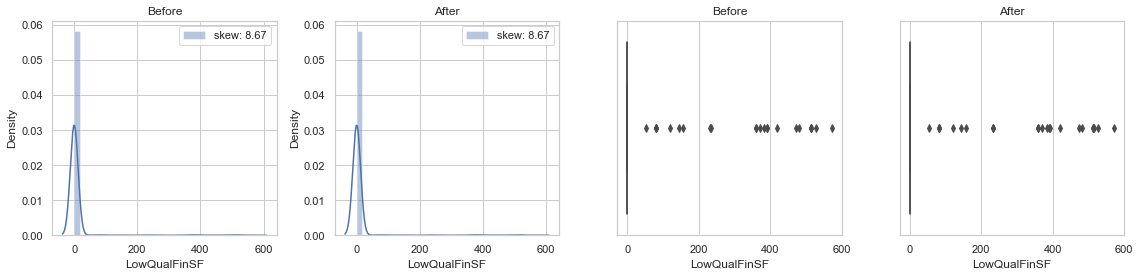

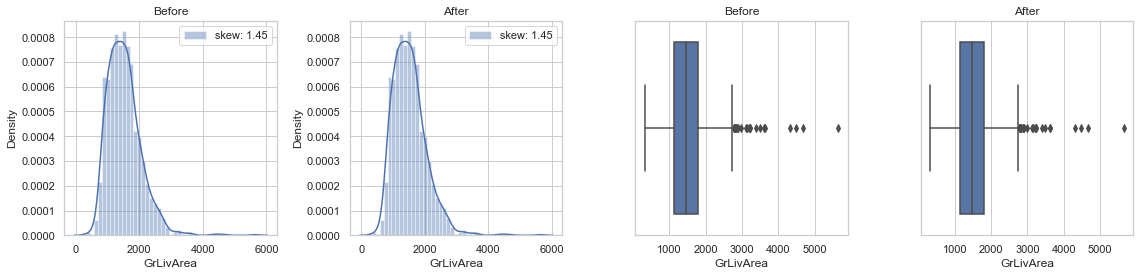

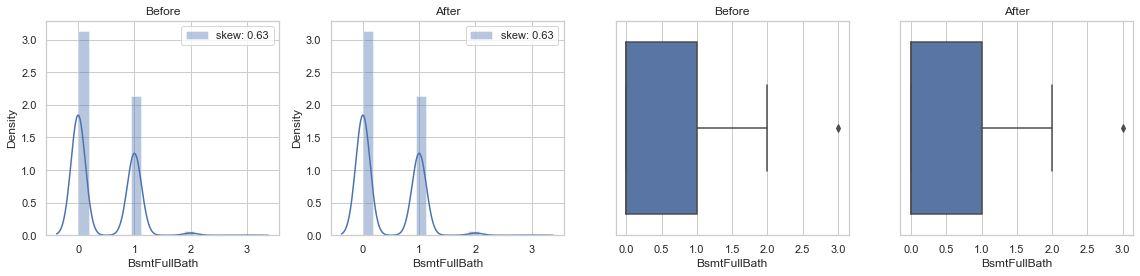

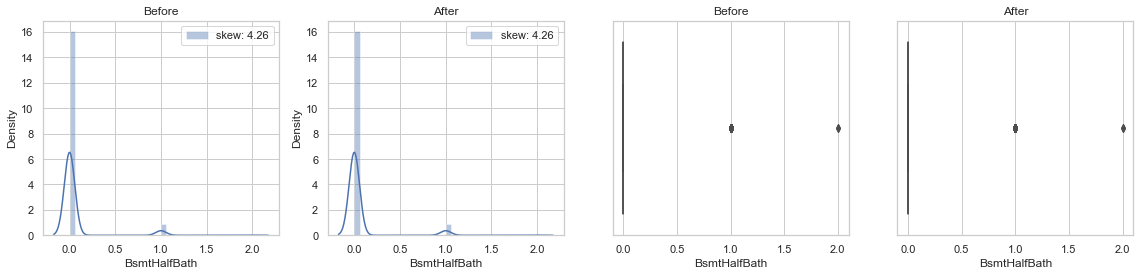

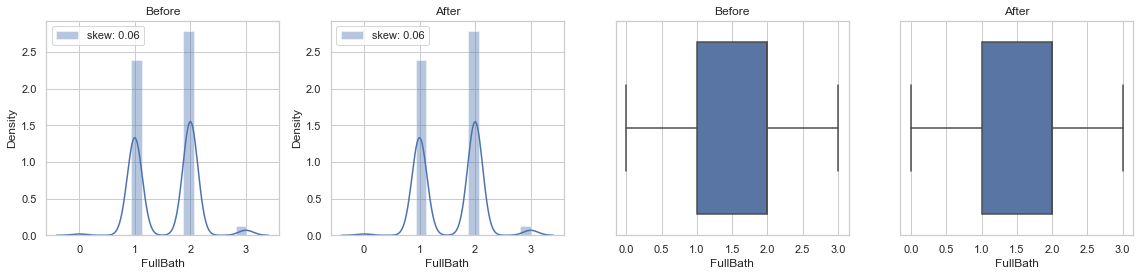

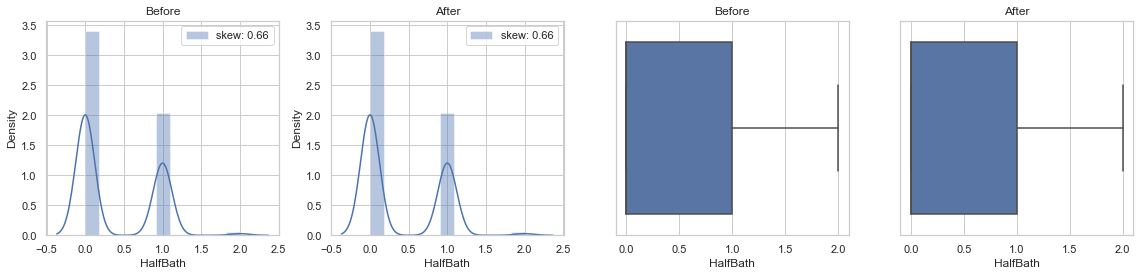

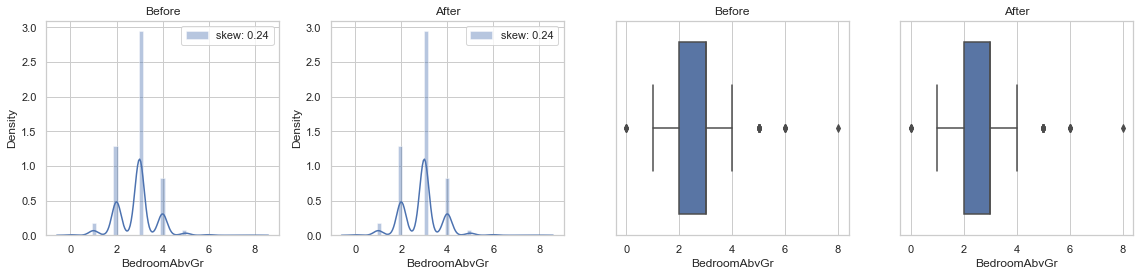

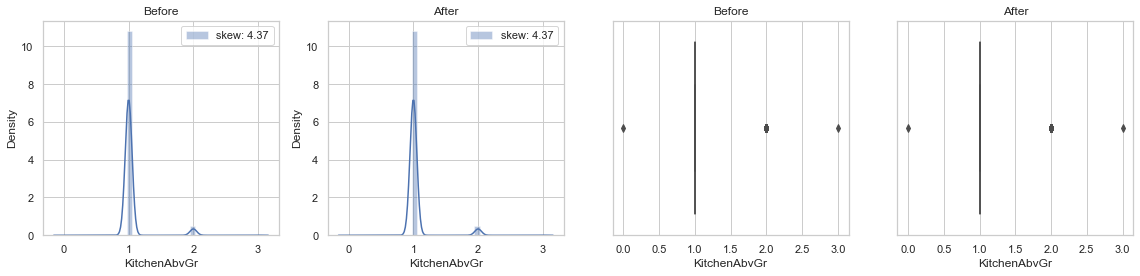

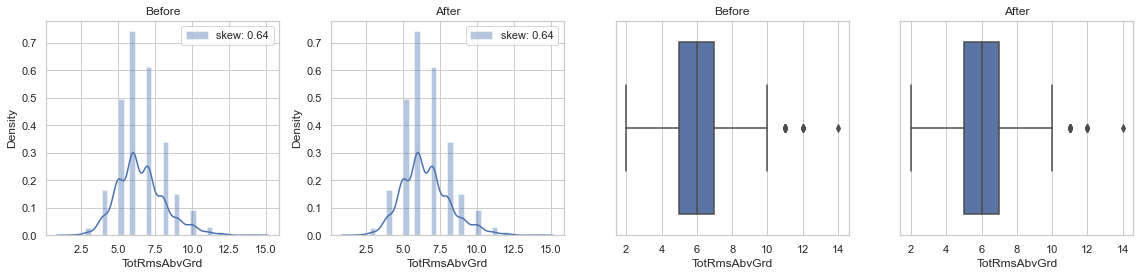

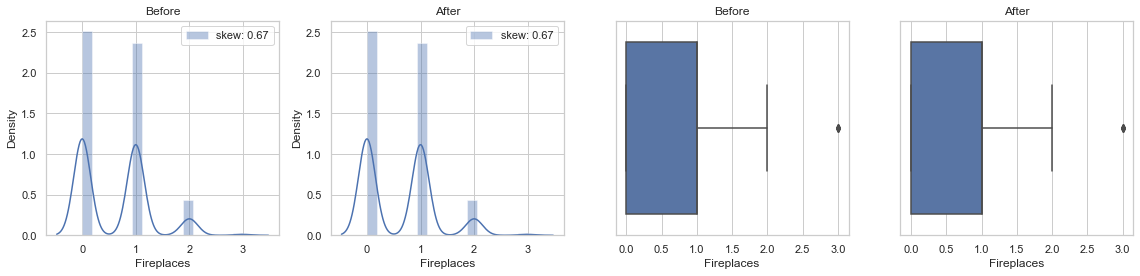

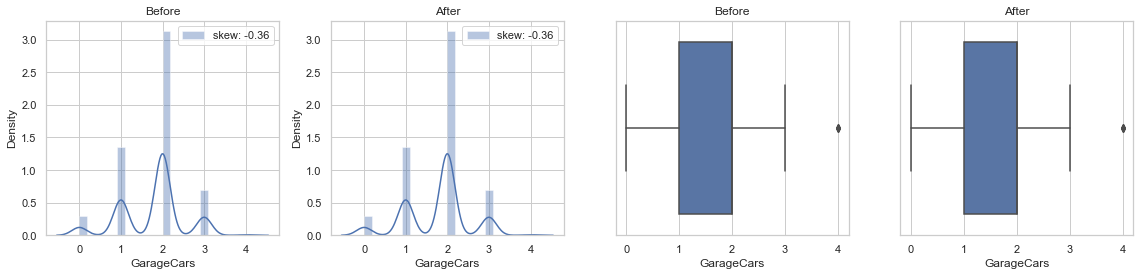

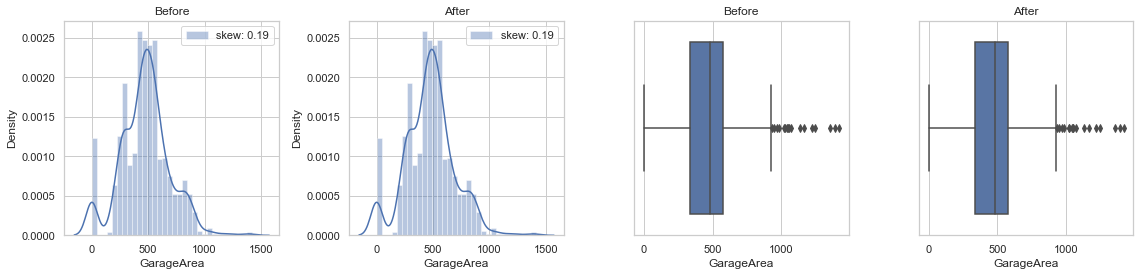

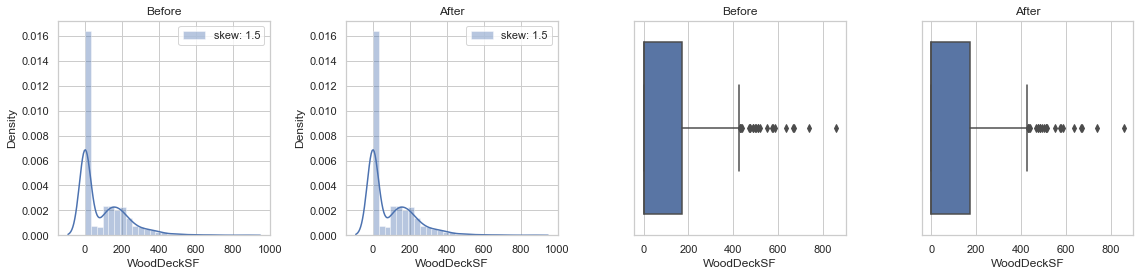

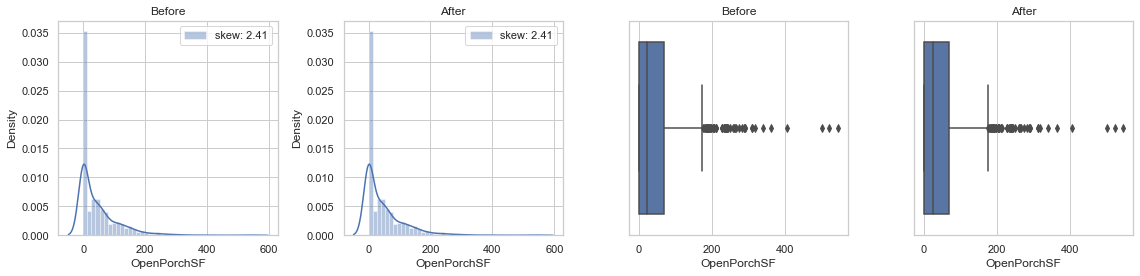

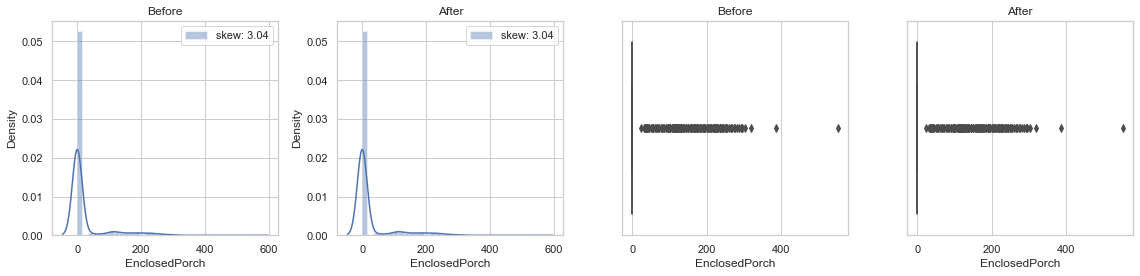

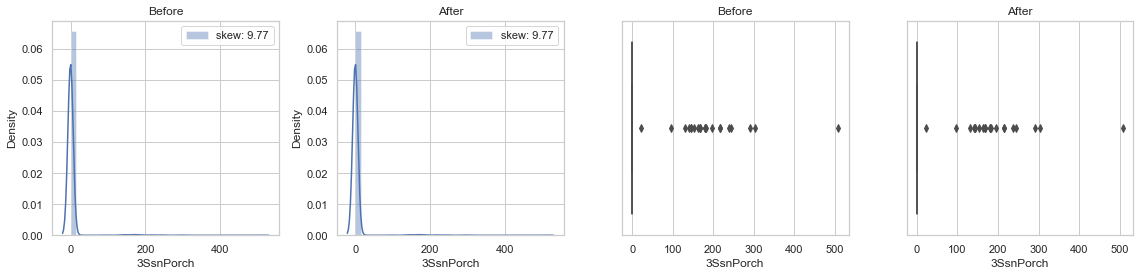

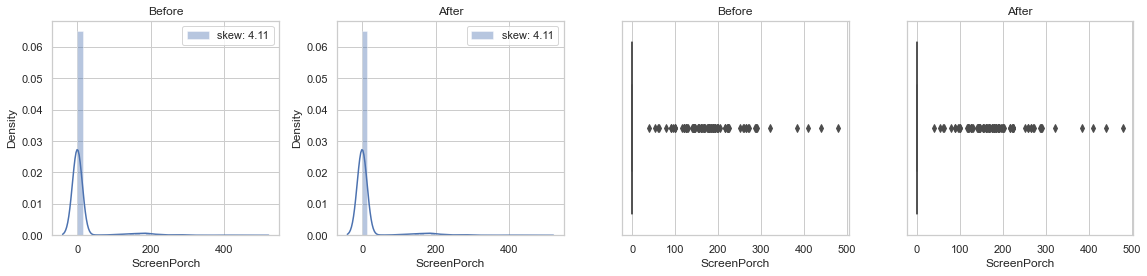

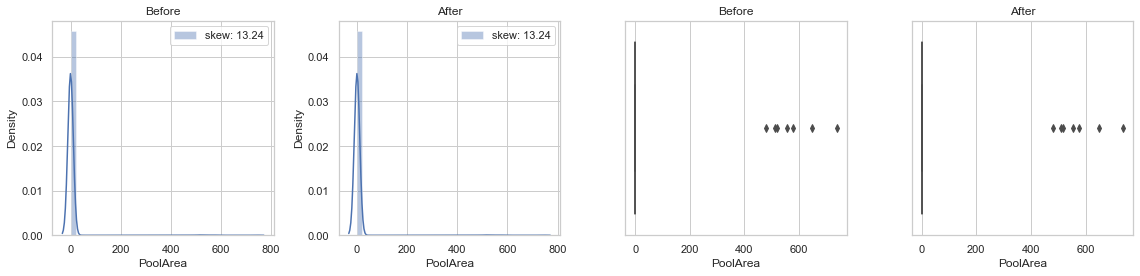

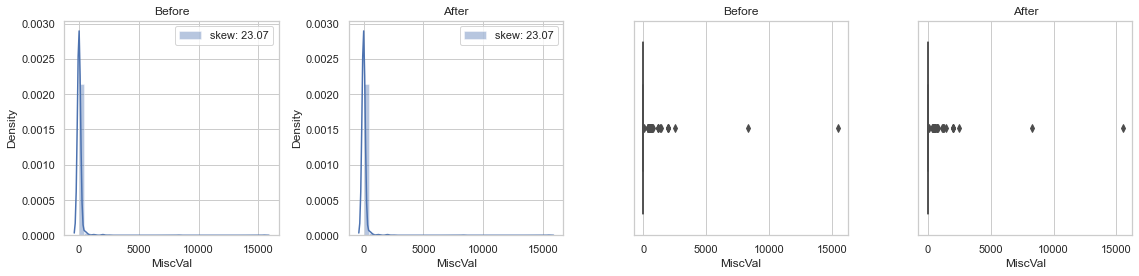

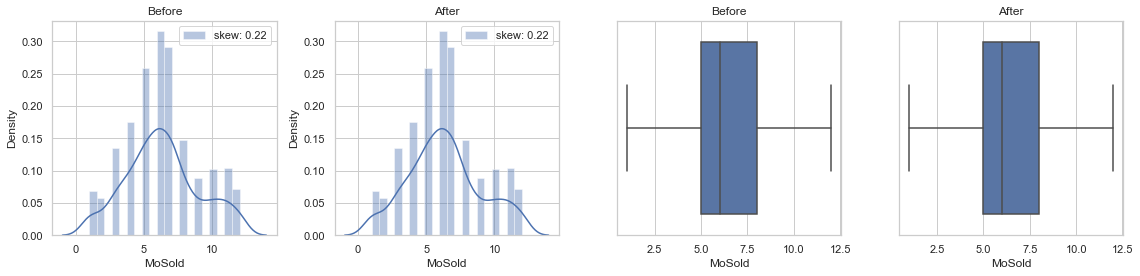

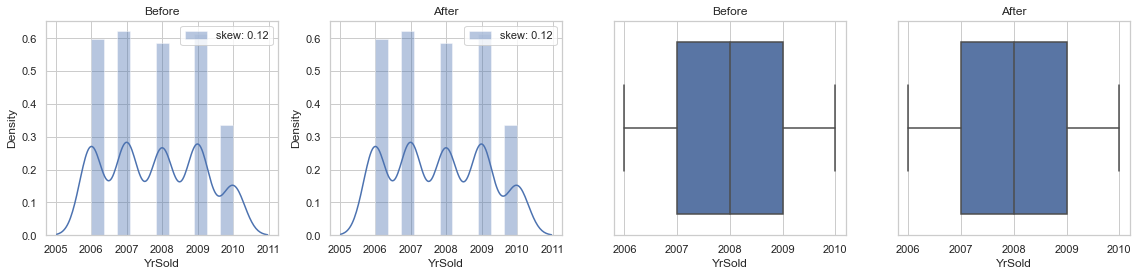

In [51]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(train_df[col], label="skew: " + str(np.round(train_df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(train_df_copy[col], label="skew: " + str(np.round(train_df_copy[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(train_df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(train_df_copy[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()


In [52]:
train_df_x=train_df_copy.drop(columns=['SalePrice'],axis=1)
y=train_df_copy['SalePrice']

In [53]:
#Scaling input variables

sc=StandardScaler()
x=sc.fit_transform(train_df_x)
x=pd.DataFrame(x,columns=train_df_x.columns)

In [54]:
# Let's explore the PCA

covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

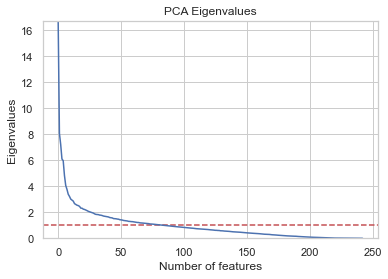

In [55]:
# Let's plot the PCA componenets into a plot

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

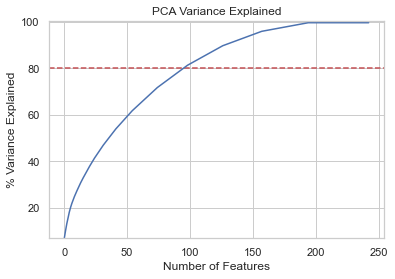

In [56]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [57]:
# Let's explore the PCA

covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

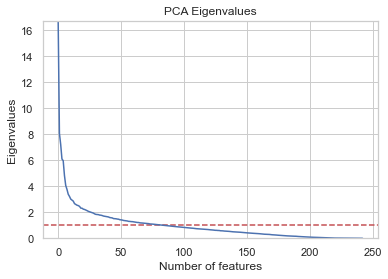

In [58]:
# Let's plot the PCA componenets

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

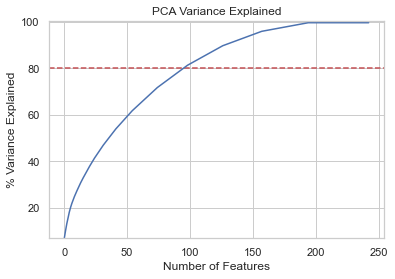

In [59]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [60]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [61]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.024213,-1.896918,0.132982,0.812769,-2.206967,-1.804752,1.035026,1.147999,0.746693,1.913745,2.591539,-1.801641,5.000936,3.041187,0.494058,-2.241203,0.955550,-0.230607,-5.349082,0.491812,-1.098845,-0.646575,1.012230,0.809271,-1.093258,0.434989,-1.150174,0.455448,1.959630,0.396112,-0.464962,-1.058859,-0.476958,0.232020,-2.089045,0.626309,0.467416,-0.248564,0.426685,-0.354100,0.416333,-0.027309,0.900033,-1.284833,-2.274371,-1.220574,-1.629982,1.175926,-0.620263,0.202564,-0.425008,0.160343,-0.063852,0.162839,-0.317300,0.993356,0.783269,0.282719,-1.327179,-0.799085,-1.308301,-0.947645,-0.076309,1.263953,2.493740,0.055963,-0.432986,0.874867,-1.292105,-0.675320,0.615703,-0.260847,-0.599988,-1.625107,-1.170629,-0.712193,-1.282363,0.758580,1.287715,0.991802,0.116246,-0.096772,-0.475947,1.268127,1.026075,-0.370030,-0.637863,-0.762879,0.129805,-0.369162
1,-2.247520,-4.218595,2.434113,2.469344,5.428244,2.218606,4.356157,-0.562294,-2.459753,0.702777,3.234432,5.209171,-1.655889,0.043200,-3.971005,2.237611,-3.070087,-1.402654,-1.566641,-0.184535,-0.185440,-2.453517,-0.522015,-1.669107,2.298533,-0.415979,3.602469,-1.602467,-0.469226,3.420819,2.353425,1.967619,-1.058176,1.297605,-0.025270,0.432249,1.269398,-0.982382,1.073852,1.723702,0.959539,0.613980,0.966912,1.242944,-2.051160,-1.395207,-1.246964,-0.595815,-0.826193,-0.674387,3.056481,-1.464256,-1.917855,-0.199296,0.147983,1.672687,0.212284,1.002354,-0.374726,-0.253283,0.535116,1.543198,-1.183493,-0.651038,0.690591,0.506905,-0.493878,-1.057635,1.603903,0.539494,0.762207,1.199392,-0.049949,-1.823041,0.012010,-1.817288,0.800821,0.073802,-0.999458,0.820958,-1.098438,2.742183,0.946306,2.447259,-1.631652,0.624049,-0.139164,0.228743,-0.227168,-1.182975
2,-3.177182,-0.067144,0.034162,-0.530211,1.283829,-2.883632,1.488003,0.122703,0.735499,-1.443032,-1.465951,-0.113763,-1.078327,1.417172,-0.653466,-0.470539,1.323923,-0.374274,1.159574,0.011537,-2.215295,2.360717,0.862179,1.312544,0.136689,0.180107,1.099052,1.360472,1.030782,-0.058776,0.916305,0.348845,-1.679845,-0.278508,-0.849675,-0.800938,0.998960,-0.236181,0.691404,0.369702,0.258232,0.587321,-1.215005,0.514131,-0.768487,0.871130,1.205409,0.829611,-0.602556,-0.273538,-0.612654,0.930272,0.583794,-0.414395,0.052555,-1.217678,0.809867,0.256644,-0.788493,0.347813,0.068486,0.602245,-0.188384,-0.315839,0.058083,0.881714,1.154403,0.227185,0.328555,0.821342,-0.121128,0.457048,-0.577439,-0.151318,-1.105970,0.859068,0.065486,0.831974,0.015791,-0.000683,-0.431396,0.096027,-0.018300,-0.389095,-0.688801,-0.010611,0.423248,-0.234815,-0.527453,-1.329518
3,-2.108237,-3.530398,1.215995,2.011880,1.144824,0.329394,-3.080791,-0.167910,1.554160,0.790434,1.022356,-0.789377,2.494307,2.442455,0.706428,0.160956,-0.283197,-0.768030,-1.978157,-0.627341,-0.364910,0.504085,-0.796182,0.854219,-1.543919,-0.241518,1.288129,-0.735609,1.108137,-1.125745,-0.382195,-0.109173,1.420606,-0.629666,0.318428,-0.868614,-1.216719,0.552160,-0.388037,0.310551,-0.812577,0.456312,-0.713804,-0.704285,-0.938990,0.088282,-0.730281,0.423154,1.052629,0.856245,-1.319050,-0.261835,-0.129495,-0.069342,-0.822498,0.802144,1.431441,-0.175715,0.780577,0.443211,-0.928156,-1.125081,0.089701,0.070638,-0.860533,-0.644088,0.268215,-0.020769,1.464484,-0.387961,-0.379455,0.010434,-0.324988,-0.857153,-0.382175,-0.314110,-0.809587,-0.268941,-0.078711,-0.031265,0.437722,-0.785787,-0.079666,-0.143858,0.187955,0.059995,0.624659,-0.619094,0.276997,0.280363
4,-3.131149,-1.375768,0.344718,1.783652,0.115268,-0.337544,-0.860835,1.612698,-0.118060,-1.223705,1.760899,0.986495,0.259241,-0.921460,2.866411,-2.582742,0.561420,-0.639833,-0.765355,-0.753138,0.204339,1.486754,-3.060176,-0.023513,0.849448,-1.760949,1.234459,0.509584,2.162144,0.832882,0.369617,1.122655,1.362

In [62]:
# Let's find the best random state

max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 98 is 0.8582072831827268


In [63]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=54)

In [64]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       KNeighborsRegressor(),
       SVR(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8274801034856735
Error:
Mean absolute error: 21480.07013871056
Mean squared error: 1025619200.8639721
Root Mean Squared Error: 32025.29001998221
r2_score: 0.8437048604047341
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 28397.696581196582
Mean squared error: 1637803093.1837606
Root Mean Squared Error: 40469.77999920139
r2_score: 0.7504135425086831
*************************************************************


score of KNeighborsRegressor() is: 0.7961225925496059
Error:
Mean absolute error: 26714.549572649572
Mean squared error: 1621865358.4586327
Root Mean Squared Error: 40272.38953003202
r2_score: 0.7528423099026611
*************************************************************


score of SVR() is: -0.04568633031738489
Error:
Mean absolute error: 58256.37221304475
Mean squared error: 6883603674.382646
Root Mean Squared Error: 82967.48564577961
r2_score: -0.048999274

In [65]:
# Let's Use the GridSearchCV to find the best paarameters in Ridge Regressor

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rg=Ridge()

reg=GridSearchCV(rg,parameters,n_jobs=-1)
reg.fit(x,y)
print(reg.best_params_)

{'alpha': 25}


In [66]:
# Let's use the Ridge Regressor with its best parameters

RG=Ridge(alpha=25)
RG.fit(x_train,y_train)
print('Score:',RG.score(x_train,y_train))
y_pred=RG.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.8274412541713227


Mean absolute error: 21320.368551327545
Mean squared error: 1016698486.8967898
Root Mean Squared error: 31885.70975996598


r2_score: 0.8450642969613194




In [67]:
# Let's Cross validate the Ridge Regressor

score=cross_val_score(RG,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.8649654  0.77339923 0.77659556 0.66818339 0.82096274 0.31665481
 0.79162583 0.76605747 0.64146179 0.84121141]
Mean Score: 0.7261117632162899
Standard deviation: 0.15178068157601649


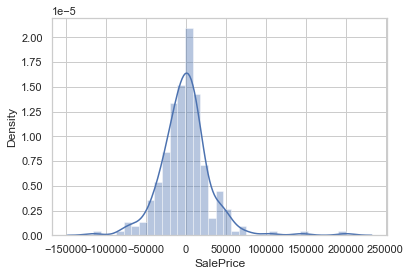

In [68]:
# Let's plot the distribution plot and the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

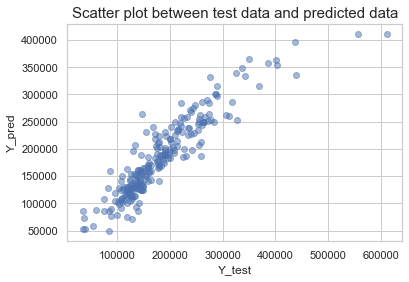

In [69]:
# Let' plot the Scatter plot between test data and predicted data

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [70]:
#filling missing values in categorical columns as NA in Test data.
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
test_df[columns] = test_df[columns].fillna('NA')

#filling missing values in MasVnrType with None
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')

#filling missing values in GarageYrBlt with 0
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna('0')

#Imputing the missing values with their median

test_df['LotFrontage'].fillna(test_df['LotFrontage'].median(),inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(),inplace=True)

In [71]:
#Encoding categorical columns
categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

test_df = pd.get_dummies(test_df, columns = categorical_colss, drop_first=True)

In [72]:
test_df.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [73]:
test_df_copy=test_df.copy()

In [74]:
def percentile_capping(test_df, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=test_df[col], limits=(from_low_end, from_high_end), inplace=True)

In [75]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [76]:
percentile_capping(test_df_copy, features, 0.01, 0.10)
test_df_copy.shape

(292, 213)

In [77]:
# Let's Scale the input variables

sc=StandardScaler()
x1=sc.fit_transform(test_df)
x1=pd.DataFrame(x1,columns=test_df.columns)

In [78]:
# Let's check the PCA

covar_matrix = PCA(n_components = len(x1.columns))
covar_matrix.fit(x1)

PCA(n_components=213)

In [79]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [80]:
pd.DataFrame(data=x1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,-7.230157,2.222011,1.496484,4.043805,-1.655639,-0.938563,1.229618,-0.832792,-0.930155,1.453895,1.732049,-2.409918,0.140064,-0.367026,-0.814065,0.407617,-1.690971,0.354629,-1.051802,0.622528,1.372926,1.223724,1.264089,-0.005366,0.848494,-0.540583,-1.736523,-1.241006,0.735304,0.131705,0.795363,0.485132,0.858931,0.898337,0.040531,-1.914316,-2.433161,-0.223222,1.244894,-0.429538,-1.051599,0.243812,0.376189,2.606444,-1.107369,0.413293,-1.245577,1.426352,-0.024548,0.441877,0.131752,-2.380734,-0.895665,-0.121551,0.785381,-1.261150,-0.931443,-2.002824,0.764595,-0.071043,0.024380,-1.868770,-1.257152,-1.507341,0.836176,0.281359,0.809731,-0.133785,-1.453076,0.148658,0.609284,-0.062906,-0.507884,0.351015,-0.895243,-0.084736,0.552742,-0.811228,-0.811447,-0.555121,-0.221739,-0.384322,-0.119743,0.065731,0.333320,1.367193,1.021135,0.324552,0.742920,-0.689099
1,-3.072242,-0.239101,0.445989,-0.207622,-2.681405,2.294892,0.164982,-1.183889,-0.636800,1.014300,1.255976,-0.423491,1.615218,2.333984,0.657691,-2.509073,-1.032836,-0.843425,3.171877,1.548481,1.867012,0.804674,-1.706532,1.194882,2.679763,0.611713,-0.615734,-0.923142,1.128289,-0.908327,0.410471,-0.603305,0.050743,-0.559869,2.061150,-0.130473,-0.689840,0.267259,0.011382,-0.654810,0.146743,-0.118892,1.350094,0.823712,-0.666209,0.656425,-1.708420,3.054803,-0.219339,-0.335967,1.415424,-0.958158,0.154535,-0.377094,0.331106,0.934481,0.155669,-1.220396,0.965347,0.478269,0.176268,-0.044839,-0.540384,0.081092,0.263412,1.493390,1.724473,-0.874374,-0.544794,-0.057443,2.427750,-0.273792,-0.446248,1.808943,0.750577,0.229506,0.499731,-1.130846,0.466074,-0.420338,1.303441,1.387335,0.834533,-1.279134,0.657967,3.192575,0.465731,0.816589,0.631655,-0.987268
2,-4.352944,1.294936,-0.698007,0.687803,-1.170315,-1.543662,-1.602387,1.987478,0.499538,-0.524646,-0.448051,0.401829,0.769327,-0.054876,0.106045,0.920133,0.261084,0.408110,-0.205547,-0.330083,-0.540028,-1.841833,1.332129,0.849742,-0.197083,-1.312754,-0.338440,-0.189892,-0.687818,0.827048,-0.292380,-0.785200,1.109164,0.663557,-0.925596,-0.575654,0.247714,-1.433517,0.851361,0.984299,0.096189,0.118251,0.813351,-1.206585,-1.344723,0.443888,-0.575545,-0.031417,-0.548531,0.246349,-0.689386,-1.112343,0.313698,0.051799,-0.804966,-0.110970,0.541849,-0.397966,-0.770348,0.491200,-0.849376,0.348565,0.651507,-0.149706,0.350266,0.740053,1.095257,0.583893,0.544421,-1.240130,-0.069987,-0.105421,-0.791328,0.574672,1.655454,-0.491664,0.112933,-0.187368,-0.289790,0.298966,-0.743873,0.475766,-0.307787,-0.053860,0.470665,-0.408413,-0.678701,0.292220,-0.459685,-1.135013
3,2.364058,-1.528634,0.738506,0.329316,3.287338,-1.342443,0.537068,-1.117912,-1.383874,1.915644,0.147852,1.439666,-2.265302,-0.679915,1.789731,-0.387989,0.348123,-1.724975,-3.056798,0.648676,1.577302,-0.444395,-0.374883,-0.042982,-1.765040,0.609361,0.446645,-0.418607,-0.143182,-0.469532,-0.692535,0.696966,0.307495,0.834054,0.139767,1.128328,-1.206807,-0.749611,-1.559218,0.765526,0.185383,0.922074,1.321922,1.045827,0.552904,-1.265918,-0.428193,1.696485,0.458333,0.692136,-1.154522,-1.282741,-0.421546,-1.718396,-0.500526,0.616344,0.037196,0.627091,-0.469840,1.056426,2.769071,-1.767936,-1.236011,2.776876,0.998047,-0.755747,1.022084,0.013198,-0.643312,-0.821805,1.336323,2.712572,-0.593332,-0.342657,0.777059,-1.492317,-0.982524,-0.867461,-0.790784,0.243157,1.260086,0.489879,0.440977,-1.126095,-2.048535,-1.410642,-0.410009,0.540840,0.252786,-0.910837
4,-4.680780,2.076735,-1.818632,-0.837280,3.532847,-1.361782,0.684049,1.214704,0.471511,-0.417898,0.244754,-0.343047,-0.323500,-1.356812,1.909554,-1.777668,-0.512112,-1.056734,-1.227971,0.935636,-0.159965,0.653972,0.356912,-1.728224,1.745440,2.027601,0.937935,-0.885103,1.144766,2.310307,-1.471105,-0.661605,0.003031